### Compression de données sans perte. Algorithmes RLE et Huffmann.

L'objectif de ce TP est de comparer deux algorithmes de compression de données en terme de :
* complexité algorithmique
* temps de calcul
* performance (taux de compression). Le taux de compression, en pourcents, est défini par :

  $ taux\_compression = 100 \times \frac{taille\_texte\_comprimé}{texte\_original}$

Le texte à compresser est extrait des Misérables de Victor Hugo :

In [121]:
texte_miserables = """Il entendit un jour conter dans un salon un procès criminel qu'on
instruisait et qu'on allait juger. Un misérable homme, par amour pour
une femme et pour l'enfant qu'il avait d'elle, à bout de ressources,
avait fait de la fausse monnaie. La fausse monnaie était encore punie de
mort à cette époque. La femme avait été arrêtée émettant la première
pièce fausse fabriquée par l'homme. On la tenait, mais on n'avait de
preuves que contre elle. Elle seule pouvait charger son amant et le
perdre en avouant. Elle nia. On insista. Elle s'obstina à nier. Sur ce,
le procureur du roi avait eu une idée. Il avait supposé une infidélité
de l'amant, et était parvenu, avec des fragments de lettres savamment
présentés, à persuader à la malheureuse qu'elle avait une rivale et que
cet homme la trompait. Alors, exaspérée de jalousie, elle avait dénoncé
son amant, tout avoué, tout prouvé. L'homme était perdu. Il allait être
prochainement jugé à Aix avec sa complice. On racontait le fait, et
chacun s'extasiait sur l'habileté du magistrat. En mettant la jalousie
en jeu, il avait fait jaillir la vérité par la colère, il avait fait
sortir la justice de la vengeance. L'évêque écoutait tout cela en
silence. Quand ce fut fini, il demanda:

--Où jugera-t-on cet homme et cette femme?

--À la cour d'assises.

Il reprit:

--Et où jugera-t-on monsieur le procureur du roi?

Il arriva à Digne une aventure tragique. Un homme fut condamné à mort
pour meurtre. C'était un malheureux pas tout à fait lettré, pas tout à
fait ignorant, qui avait été bateleur dans les foires et écrivain
public. Le procès occupa beaucoup la ville. La veille du jour fixé pour
l'exécution du condamné, l'aumônier de la prison tomba malade. Il
fallait un prêtre pour assister le patient à ses derniers moments. On
alla chercher le curé. Il paraît qu'il refusa en disant: Cela ne me
regarde pas. Je n'ai que faire de cette corvée et de ce saltimbanque;
moi aussi, je suis malade; d'ailleurs ce n'est pas là ma place. On
rapporta cette réponse à l'évêque qui dit:

--Monsieur le curé a raison. Ce n'est pas sa place, c'est la mienne."""

## Travail préliminaire

* Compter le nombre de caractères qui composent ce texte.

In [122]:
nombre_de_caracteres = len(texte_miserables)
print("Nombre de caractères qui composent ce texte : ", nombre_de_caracteres)

Nombre de caractères qui composent ce texte :  2091


### Algorithme RLE

L'un des algorithmes de compression sans perte les plus simples est l'algorithme Run-Length Encoding (RLE), également connu sous le nom de codage par longueurs de runs. Il est particulièrement efficace pour compresser des données contenant des répétitions consécutives de caractères ou de symboles.

Le principe de base de l'algorithme RLE est le suivant :

* Parcourez la séquence de données d'entrée de gauche à droite.
* Lorsque vous trouvez une série de caractères identiques consécutifs, comptez leur nombre.
* Écrivez le caractère suivi du nombre de fois qu'il apparaît dans la sortie compressée.
* Répétez les étapes 2 et 3 jusqu'à ce que vous ayez parcouru toute la séquence d'entrée.

Voici un exemple simple :

Données d'entrée : "AAAABBBCCDAA"

Données compressées avec RLE : "4A3B2C1D2A"

### A noter : on considérera une chaîne de caractères comme une liste de caractères :
```python
chaine = "Bonjour"
print(chaine[1])
>>> 'o'
```

### Implémentation de l'algorithme RLE pour la compression et la décompression

En utilisant l'algorithme RLE, compresser le texte des Misérables. Vous pourrez par exemple code une fonction `compress_RLE` et `uncompress_RLE`.
Déterminer le taux de compression obtenu ainsi que la complexité de l'algorithme (dénombrez les opérations et mesurez le temps d'exécution).

In [2]:
def compress_RLE(message):
    encoded_string = ""
    i = 0
    while (i <= len(message)-1):
        count = 1
        ch = message[i]
        j = i
        while (j < len(message)-1): 
        # if the character at the current index is the same as the character at the next index.
        # If the characters are the same, the count is incremented to 1
            if (message[j] == message[j + 1]): 
                count = count + 1
                j = j + 1
            else: 
                break
        ### the count and the character is concatenated to the encoded string
        encoded_string = encoded_string + str(count) + ch
        i = j + 1
    return encoded_string

# Exemple de compression
assert compress_RLE("AAAABBBCCDAA") == "4A3B2C1D2A"

In [3]:
def uncompress_RLE(our_message):
    decoded_message = ""
    i = 0
    j = 0
    # splitting the encoded message into respective counts
    while (i <= len(our_message) - 1):
        run_count = int(our_message[i])
        run_word = our_message[i + 1]
        # displaying the character multiple times specified by the count
        for j in range(run_count):
            # concatenated with the decoded message
            decoded_message = decoded_message + run_word
            j = j + 1
        i = i + 2
    return decoded_message

assert uncompress_RLE("4A3B2C1D2A") == "AAAABBBCCDAA"

### Qualification de l'algorithme RLE sur une chaîne aléatoire
Compresser une chaîne de caractères composée de 1000 caractères choisis parmi "A", "B", "C" ou "D". Pour cela, on utilisera la fonction `random.choice`. Déterminer le taux de compression moyen.

In [11]:
import random
N = 1000

ch = "".join(random.choice(['A', 'B', 'C', 'T']) for _ in range(N))

#"".join([
# print(ch)
ch_compressed = compress_RLE(ch)
# print(ch_compressed)
taux_de_comp = len(ch_compressed) / 1000
print(f"Taux de compression pour une chaîne de 1000 caractères composés de 4 caractères différents : {taux_de_comp*100:.2f}%")

Taux de compression pour une chaîne de 1000 caractères composés de 4 caractères différents : 149.00%


### Qualification de l'algorithme RLE sur une chaîne de caractères en langue française
* A l'aide de la fonction `compress_RLE`, comprimer le texte extrait des Misérables
* utiliser la fonction `uncompress_RLE` pour le décompresser, et vérifier qu'on retrouve bien le texte original
* calcul le taux de compression pour ce texte
* que pouvez-vous conclure quant à cet algorithme de compression sans perte, en comparant les performances sur une chaîne aléatoire et sur une chaîne en langue française ?

In [126]:
# compression du texte extrait des misérables
miserables_comprime = compress_RLE(texte_miserables)
miserables_decompresses = uncompress_RLE(miserables_comprime)
assert texte_miserables == miserables_decompresses

taille_comprime = len(miserables_comprime)
taux_de_compression = taille_comprime / len(texte_miserables) * 100
print(f"Taux de compression: {taux_de_compression:.2f}%")

# Conclusion : l'algorithme RLE fonctionne mieux sur des chaînes avec des
# répétitions que sur du language naturel, ou il est rare de trouver des lettres qui se répètent 3 fois.
# Sur du langage naturel cet algorithme donne même un résultat dont la taille est supérieure à l'original.

Taux de compression: 194.45%


### Codage Huffman
Le codage Huffman est un algorithme de compression qui se base sur le nombre d'occurrences de chaque lette dans un texte. L'objectif est de compresser efficacement un texte en exploitant le fait que les caractères aient une fréquence d'apparition loin d'être uniforme. (Par exemple, le "e" est beaucoup plus fréquent que le "w", donc on va faire en sorte qu'il prenne moins de place en mémoire).

En voici une implémentation python ci-dessous.

In [127]:
def compterOccurences(texte):
    """
    Renvoie une liste qui associe à chaque caractère son nombre d'apparitions.

    Chaque lettre est donc dotée d'un poids (son nombre d'occurences), et
    plus son poids est élevé, plus elle sera légère en mémoire.
    (L'objectif étant ici la compression, donc d'échanger de la puissance
    de calcul contre de l'espace de stockage.)
    """
    lettres = [[0, chr(i)] for i in range(256)]
    for i in texte:
        lettres[ord(i)][0] += 1
    return lettres

def creerArbre(lettres):
    """
    Crée un arbre binaire à partir des lettres et de leur poids.

    On choisit de représenter un arbre de la façon suivante :
      * Une feuille est un 2-uplet : le nombre d'occurences et la lettre
        On notera que compterOccurences renvoie en fait une liste de feuilles.
      * Un noeud est un 3-uplet : la somme des occurences de toutes
        les feuilles descendantes, le fils gauche et le fils droit.
    Ensuite, on construit l'arbre en piochant les deux noeuds de poids
    le plus faible, on en fait un nouveau noeud que l'on remet dans le tas.
    On s'arrête dès qu'il reste un unique noeud (qui est l'arbre voulu)
    """
    # On commence par enlever les lettres qui ne sont pas présentes
    noeuds = [(k, v) for (k, v) in lettres if k > 0]
    # Puis on récupère les deux noeuds (ou feuilles) de poids le plus faible,
    # et on en fait un noeud, de poids la somme des deux petits poids
    # On boucle tant qu'il y a reste au moins deux noeuds
    l = len(noeuds)
    while l >= 2:
        # Indice et noeud des minima des poids
        # (on initialise avec les deux premières valeurs)
        petitMin = (0, noeuds[0])
        grandMin = (1, noeuds[1])
        for i in range(2, l):
            if noeuds[i][0] <= petitMin[1][0]:  # poids < petitMin < grandMin
                grandMin = petitMin
                petitMin = (i, noeuds[i])
            elif noeuds[i][0] <= grandMin[1][0]:  # petitMin < poids < grandMin
                grandMin = (i, noeuds[i])
        nouveauNoeud = (
            petitMin[1][0] + grandMin[1][0],
            noeuds[petitMin[0]],
            noeuds[grandMin[0]]
        )
        # On enlève les deux noeuds (ou feuilles) précedentes
        # et on ajoute le nouveau noeud
        noeuds[petitMin[0]] = nouveauNoeud
        noeuds.pop(grandMin[0])
        # On a au final un noeud de moins (-2 +1)
        l -= 1
    # À cet instant il ne reste plus qu'un noeud, qui est la racine de
    # l'arbre de Huffman
    return noeuds[0]

def creerDico(arbre):
    """
    Renvoie un dictionnaire {lettre: code binaire}.

    On va explorer l'arbre à l'aide d'une file : si on rencontre une feuille,
    on la traite, si on rencontre un noeud, on ajoute les deux branches à la file.
    Le premier composant d'un élément de la file est le code binaire jusqu'à cet élément,
    le second est un noeud ou une feuille.
    """
    fileExploration = [("", arbre)]
    dico = {}
    l = 1
    # On boucle tant que la file n'est pas vide
    while l >= 1:
        code, truc = fileExploration.pop(0)  # On défile le premier élément
        l -= 1
        if len(truc) == 2:  # C'est une feuille
            dico[truc[1]] = code  # On ajoute la lettre et son code au dico
        elif len(truc) == 3:  # C'est un noeud
            # On continue l'exploration en respectant la règle pour obtenir le code :
            # Gauche -> 0, droite -> 1
            fileExploration.append((code + "0", truc[1]))
            fileExploration.append((code + "1", truc[2]))
            l += 2
    return dico

def compress_Huffman(texte):
    """
    On se contente de remplacer les lettres du texte par le code binaire
    obtenu à l'aide de la fonction creerDico.
    """
    lettres = compterOccurences(texte)
    arbre = creerArbre(lettres)
    dico = creerDico(arbre)
    texteCompresse = ""
    for i in texte:
        texteCompresse += dico[i]
    # On n'oublie pas de renvoyer aussi le dictionnaire,
    # sinon il sera impossible de décompresser le texte
    return texteCompresse, dico

def uncompress_Huffman(texteCompresse, dicoRetourne):
    """
    Décompresse un texte à l'aide de son dico.

    Une fois encore, on utilise une file. C'est un outil très puissant
    qui permet de ne jamais écrire de fonction récursive. Chaque élément
    de la file est un 2-uplet, le premier élément est le texte décompressé
    jusque là, le second est le code binaire restant à décompresser.
    """
    # On retourne le dico
    dico = {v: k for (k, v) in dicoRetourne.items()}
    # Nombre maximum de bits d'un caractère compressé
    limite = max(len(k) for k in dico.keys())
    fileExploration = [("", texteCompresse)]
    l = 1
    while l >= 1:
        fait, restant = fileExploration.pop(0)  # On défile le premier élément
        l -= 1
        # On regarde si la décompression est terminée
        if restant == "":
            return fait
        # Sinon, on tente de remplacer les i premiers bits de restant par un caractère
        i = 0
        bits = ""
        for bit in restant:
            bits += bit
            i += 1
            if i > limite:
                # C'est pas la peine de continuer, bits est trop long
                # pour correspondre à un caractère
                break
            elif bits in dico:
                # On a la possibilité de remplacer quelques 0 et 1 par un caractère
                # alors on le fait, sans pour autant considérer que l'on a choisi
                # le bon remplacement
                fileExploration.append((fait + dico[bits], restant[i:]))
                l += 1
                # Puis on continue à explorer les possibilités
    # Aucune décompression n'a fonctionné, on ne renvoie rien
    return None

In [128]:
# Par exemple, pour ce texte en "latin" :
texte = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent fermentum aliquam ipsum non vehicula. Sed placerat aliquam aliquet. Donec magna mauris, gravida sed volutpat vitae, molestie at massa. Pellentesque et metus quis lacus tempor placerat. Aliquam erat volutpat. Vivamus dapibus mi nec nisi aliquam, et euismod augue molestie. Nunc interdum."
# On le compresse
texteCompresse, dico = compress_Huffman(texte)
print("Avant : {} bits / Après : {} bits".format(len(texte) * 8, len(texteCompresse)))
# Avant : 2816 bits / Après : 1522 bits
# (On rappelle que 1 octet = 8 bits)

Avant : 2816 bits / Après : 1522 bits


### Travail demandé pour l'algorithme de Huffman :
* vérifier que la compression/décompression fonctionne correctement avec quelques chaînes de vérification ;
* compresser la chaine du texte des Misérables et déterminer le taux de compression.

In [129]:
quelques_chaines = ['Bonjour', 'Cinq fois cinq = 25', 'Une chaîne avec accents, et ponctuation.']
for ch in quelques_chaines: 
    text, dico = compress_Huffman(ch)
    dec = uncompress_Huffman(text, dico)
    assert ch == dec

In [130]:
texte_compresse_miserables, dico_miserables = compress_Huffman(texte_miserables)
print("Avant : {} bits / Après : {} bits".format(len(texte_miserables) * 8, len(texte_compresse_miserables)))
taux_de_compression_huffman = len(texte_compresse_miserables) / (len(texte_miserables) * 8) * 100
print(f"Taux de compression obtenu : {taux_de_compression_huffman:.2f}%")

Avant : 16728 bits / Après : 9588 bits
Taux de compression obtenu : 57.32%


### Complexité de l'algorithme de Huffman
Déterminer la complexité algorithmique de l'algo de Huffman à la fois pour la compression et la décompression. Pour cela :
* vous mesurerez soit le nombre d'oéprations, soit le temps requis, pour compresser une chaîne de longueur N caractères choisis au hasard dans l'ensemble de la table ASCII.
* vous ferez varier N entre 10 et 20000 (dix mille) par pas de 100 et tracerez un graphique
* vous chercherez un dominant puis en déduirez une complexité algorithmique dans la notation $O$.

Pour information, pour choisir au hasard des éléments dans une liste, on utilise la fonction `random.choice`, et python donne la liste de tous les caractères ascii avec les instructions :

```python
import string
print(string.printable)
```

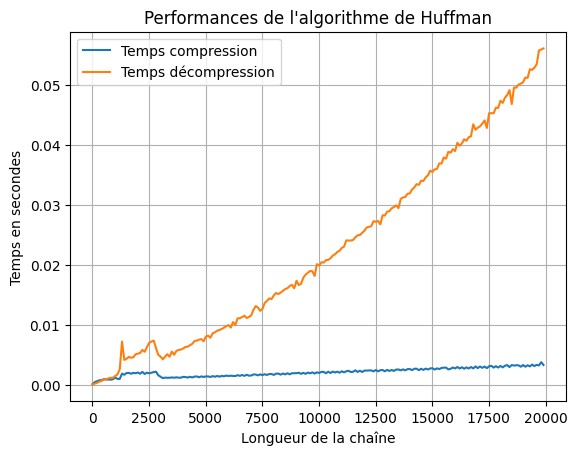

In [131]:
import string
import time
import numpy as np

def creer_chaine_aleat(n):
    """n : taille de la chaine souhaitee"""
    return "".join(random.choices(string.printable, k=n))
    
N = range(10, 20000, 100)
temps_compression = []
temps_decompression = []
for i in N:
    chaine = creer_chaine_aleat(i)
    t_0 = time.perf_counter()
    t, d = compress_Huffman(chaine)
    t_1 = time.perf_counter()
    uncompress_Huffman(t, d)
    t_2 = time.perf_counter()
    
    temps_decompression.append(t_2 - t_1)
    temps_compression.append(t_1 - t_0)

import matplotlib.pyplot as plt
plt.plot(N, temps_compression, label = "Temps compression")
#plt.plot(N, 2e-7*np.array(N) * np.log(np.array(N)), label = "O(n2)")
plt.plot(N, temps_decompression, label = "Temps décompression")
plt.title("Performances de l'algorithme de Huffman")
plt.xlabel("Longueur de la chaîne")
plt.grid()
plt.legend()
plt.ylabel("Temps en secondes")
plt.show()

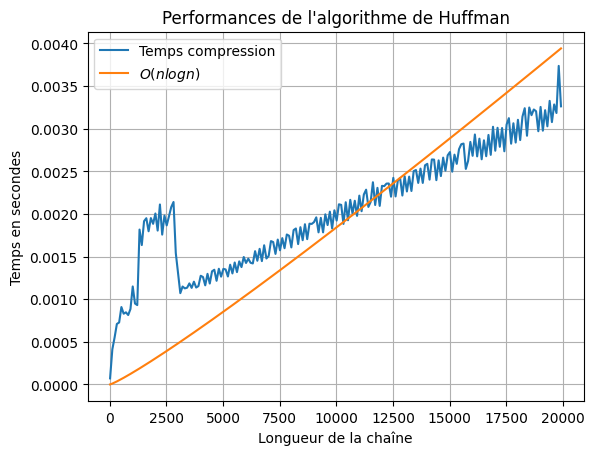

In [132]:
plt.plot(N, temps_compression, label = "Temps compression")
plt.plot(N, 2e-8*np.array(N) * np.log(np.array(N)), label = "$O(nlogn)$")
plt.title("Performances de l'algorithme de Huffman")
plt.xlabel("Longueur de la chaîne")
plt.grid()
plt.legend()
plt.ylabel("Temps en secondes")
plt.show()

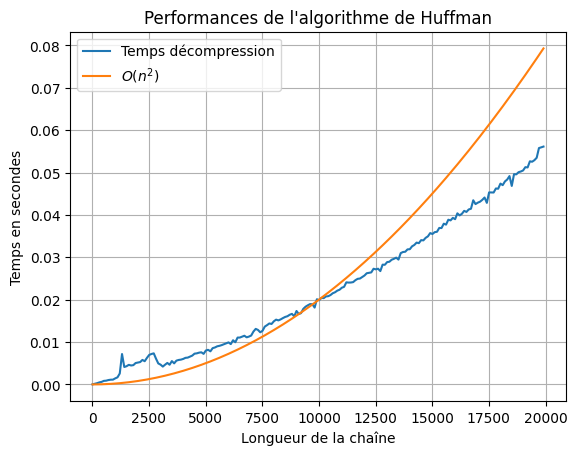

In [133]:
plt.plot(N, temps_decompression, label = "Temps décompression")
plt.plot(N, 2e-10*np.array(N) ** 2, label = "$O(n^2)$")
plt.title("Performances de l'algorithme de Huffman")
plt.xlabel("Longueur de la chaîne")
plt.grid()
plt.legend()
plt.ylabel("Temps en secondes")
plt.show()

Je constate que la compression, $O(nlogn)$ est beaucoup plus efficace que la décompression $O(n^2)$.

### Anticipation du temps requis pour la compression/décompression du texte complet des Misérables
* ouvrir le texte des misérables et déterminer la nombre de caractères
* par extrapolation de l'étude précédente, déduire le temps approximatif de compression et décompression
* effectuer la compression/décompression puis vérifier votre prédiction.

Pour charger le texte, vous utiliserez l'encodage `latin-1`:
```python
with open('LesMiserables.txt', 'r', encoding='latin-1') as fp:
    les_miserables_complet = fp.read()
```

In [134]:
with open('LesMiserables.txt', 'r', encoding='latin-1') as fp:
    les_miserables_complet = fp.read()
taille_miserables = len(les_miserables_complet)

print(f"J'anticipe un temps approximatif pour la décompression de : {2e-10 * taille_miserables ** 2:.2f} secondes")

J'anticipe un temps approximatif pour la décompression de : 96.89 secondes


In [135]:
t_0 = time.perf_counter()
t, d = compress_Huffman(les_miserables_complet)
t_1 = time.perf_counter()
uncompress_Huffman(t, d)
t_2 = time.perf_counter()
print(f"Temps compression : {t_1 - t_0:.2f} secondes")
print(f"Temps decompression : {t_2 - t_1:.2f} secondes")

Temps compression : 0.10 secondes
Temps decompression : 85.26 secondes


### Réduction du temps requis : diviser pour mieux régner
Afin d'accélérer le processus, on propose de diviser le texte en 10 parties égales, de compresser/décompresser chaque chaîne.
* implémenter cette technique
* quels sont les impacts (gains ? pertes ?) en terme de taux de compression et de temps de compression/décompression.